In [ ]:
# Import Libraries

In [243]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [244]:
data = pd.read_csv('goldstock.csv')

In [246]:
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2511 entries, 0 to 2510
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2511 non-null   int64  
 1   Date        2511 non-null   object 
 2   Close       2511 non-null   float64
 3   Volume      2511 non-null   float64
 4   Open        2511 non-null   float64
 5   High        2511 non-null   float64
 6   Low         2511 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 137.4+ KB


,Unnamed: 0,Close,Volume,Open,High,Low
count,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000,2511.000000
mean,1260.792911,1498.726085,185970.770609,1498.725528,1508.451454,1488.869932
std,729.262879,298.824811,97600.769382,299.118187,301.262244,296.417703
min,0.000000,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,630.500000,1249.850000,126693.500000,1249.500000,1257.300000,1242.350000
50%,1259.000000,1332.800000,175421.000000,1334.000000,1342.400000,1326.600000
75%,1888.500000,1805.850000,234832.000000,1805.600000,1815.450000,1793.050000
max,2532.000000,2093.100000,787217.000000,2094.400000,2098.200000,2074.600000


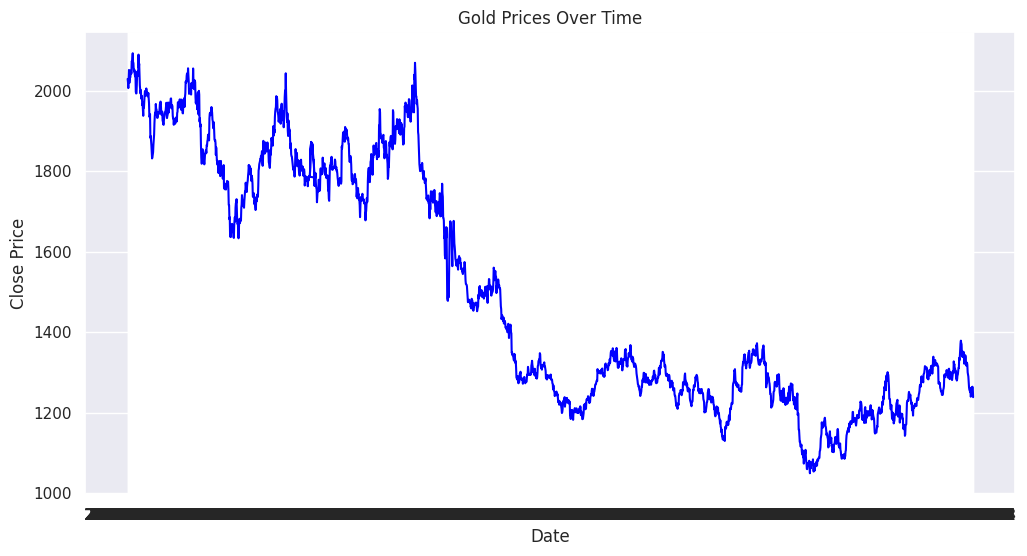

In [247]:
#Visualize the time series of gold prices
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Close'], color='blue')
plt.title('Gold Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.grid(True)
plt.show()

In [249]:
# Data Splitting
# Assuming we're using 'Open', 'High', 'Low', and 'Volume' as features
X = data[['Open', 'High', 'Low', 'Volume']]
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [251]:
# Model Training
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [252]:
# Model Evaluation
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)

Mean Absolute Error: 5.190693836978141


In [255]:
#  Future Prediction (Optional)
# Define future dates
future_dates = pd.date_range(start='2024-01-19', end='2024-01-22', freq='D')

In [256]:
future_data = pd.DataFrame({'Date': future_dates,
                            'Open': [0] * len(future_dates),
                            'High': [0] * len(future_dates),
                            'Low': [0] * len(future_dates),
                            'Volume': [0] * len(future_dates)})

In [258]:
# Use the trained model to predict closing prices for future dates
future_predictions = model.predict(future_data[['Open', 'High', 'Low', 'Volume']])

In [260]:
# Create a DataFrame to store future predictions
future_df = pd.DataFrame({'Date': future_dates, 'Predicted_Close': future_predictions})
future_df

,Date,Predicted_Close
0,2024-01-19,1059.694
1,2024-01-20,1059.694
2,2024-01-21,1059.694
3,2024-01-22,1059.694
